https://github.com/pytorch/examples/blob/master/mnist/main.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

In [3]:
X = torch.autograd.Variable(torch.FloatTensor(np.array([[0,0],[0,1],[1,0],[1,1]])),requires_grad=False).to(device)
y = torch.autograd.Variable(torch.FloatTensor(np.array([[0,1,1,0]]).T),requires_grad=False).to(device)

X.shape, y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

In [4]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [5]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [6]:
X.requires_grad

False

In [7]:
net_xor = nn.Sequential(nn.Linear(2, 2),nn.ReLU(),nn.Linear(2,1)).to(device)
net_xor

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [8]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 1)

weights_init(net_xor)

In [9]:
optimizer_net_xor = optim.SGD(net_xor.parameters(), lr=0.002, momentum=0.9)

In [11]:
net_xor.train()
for i in range(500):
    optimizer_net_xor.zero_grad()
    output = net_xor(X)
    if i%50:
        print(output.squeeze())
        print('Accuracy: ', ((output.squeeze()>0.5)==y.squeeze().byte()).sum().item()/4)
    loss = F.mse_loss(output, y)
    loss.backward()
    optimizer_net_xor.step()

tensor([-0.6372,  0.4172, -0.8506, -0.0898], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.6102,  0.4296, -0.8115, -0.0761], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.5723,  0.4472, -0.7565, -0.0567], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.5250,  0.4692, -0.6879, -0.0324], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.4701,  0.4948, -0.6081, -0.0040], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([-0.4091,  0.5235, -0.5192,  0.0277], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([-0.3435,  0.5545, -0.4235,  0.0620], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([-0.2748,  0.5871, -0.3230,  0.0982], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([-0.2042,  0.6208, -0.2193,  0.1356], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([-0.1330,  0.6548, -0.1143,  0.1735], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([-0.0623,  0.6887, -0.0101,  0.2112], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([0.0039, 0.7219, 0.

tensor([0.0870, 0.8355, 0.4825, 0.5205], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0859, 0.8351, 0.4846, 0.5201], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0837, 0.8343, 0.4884, 0.5191], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0826, 0.8338, 0.4903, 0.5185], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0815, 0.8333, 0.4922, 0.5180], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0805, 0.8328, 0.4940, 0.5173], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0795, 0.8323, 0.4958, 0.5167], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0785, 0.8317, 0.4975, 0.5160], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0775, 0.8312, 0.4993, 0.5153], grad_fn=<SqueezeBackward0>)
Accuracy:  0.5
tensor([0.0766, 0.8307, 0.5010, 0.5146], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([0.0757, 0.8302, 0.5027, 0.5138], grad_fn=<SqueezeBackward0>)
Accuracy:  0.75
tensor([0.0749, 0.8297, 0.5044, 0.5131], grad_fn=<SqueezeBackward0>)
Accur

tensor([0.0967, 0.8007, 0.6256, 0.4251], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0962, 0.8005, 0.6266, 0.4240], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0968, 0.8003, 0.6280, 0.4229], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0975, 0.8000, 0.6304, 0.4208], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0976, 0.7998, 0.6315, 0.4197], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0976, 0.7996, 0.6322, 0.4186], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0987, 0.7995, 0.6339, 0.4175], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0995, 0.7993, 0.6351, 0.4165], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1000, 0.7992, 0.6363, 0.4154], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1004, 0.7991, 0.6374, 0.4143], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1006, 0.7989, 0.6386, 0.4133], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1007, 0.7988, 0.6398, 0.4122], grad_fn=<SqueezeBackward0>)
Accurac

tensor([0.1108, 0.8004, 0.7306, 0.3239], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1108, 0.8005, 0.7315, 0.3229], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1105, 0.8006, 0.7321, 0.3219], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1109, 0.8007, 0.7332, 0.3208], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1119, 0.8009, 0.7348, 0.3188], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1124, 0.8010, 0.7356, 0.3178], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1126, 0.8010, 0.7364, 0.3168], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1125, 0.8011, 0.7372, 0.3157], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1122, 0.8012, 0.7380, 0.3147], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1117, 0.8010, 0.7388, 0.3136], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1117, 0.8007, 0.7395, 0.3126], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1121, 0.8013, 0.7403, 0.3116], grad_fn=<SqueezeBackward0>)
Accurac

tensor([0.1068, 0.8207, 0.8005, 0.2420], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1064, 0.8210, 0.8012, 0.2414], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1057, 0.8204, 0.8018, 0.2407], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1054, 0.8207, 0.8024, 0.2401], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1056, 0.8220, 0.8030, 0.2394], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1063, 0.8228, 0.8042, 0.2381], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1061, 0.8231, 0.8048, 0.2375], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1057, 0.8234, 0.8048, 0.2368], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1058, 0.8238, 0.8058, 0.2362], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1063, 0.8241, 0.8066, 0.2355], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1065, 0.8244, 0.8072, 0.2349], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.1063, 0.8248, 0.8078, 0.2342], grad_fn=<SqueezeBackward0>)
Accurac

tensor([0.0810, 0.8668, 0.8625, 0.2071], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0806, 0.8677, 0.8634, 0.2074], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0799, 0.8683, 0.8642, 0.2077], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0795, 0.8689, 0.8647, 0.2076], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0788, 0.8690, 0.8651, 0.2073], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0
tensor([0.0783, 0.8693, 0.8653, 0.2068], grad_fn=<SqueezeBackward0>)
Accuracy:  1.0


In [12]:
net_xor.eval()
output = net_xor(X)
output

tensor([[0.0775],
        [0.8693],
        [0.8654],
        [0.2061]], grad_fn=<AddmmBackward>)

In [13]:
for name, param in net_xor.named_parameters():
    if param.requires_grad:
        print (name, param.data)

0.weight tensor([[-0.5448, -0.5416],
        [-0.7307, -0.7307]])
0.bias tensor([1.0863, 0.7304])
2.weight tensor([[ 1.2175, -1.9867]])
2.bias tensor([0.2061])


###########################################

In [14]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

In [15]:
batch_size = 32
dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=False)

In [16]:
def draw_random_images(loader):
    rand_idxs = [np.random.randint(0, batch_size-1) for i in range (4)]
    for t in loader:
        X = t[0][rand_idxs]
        y = t[1][rand_idxs]

        print(X.shape, y.shape)

        f, axarr = plt.subplots(2,2)

        axarr[0,0].imshow(X[0].squeeze())
        axarr[0,0].set_title(str(y[0].item()))

        axarr[0,1].imshow(X[1].squeeze())
        axarr[0,1].set_title(str(y[1].item()))

        axarr[1,0].imshow(X[2].squeeze())
        axarr[1,0].set_title(str(y[2].item()))

        axarr[1,1].imshow(X[3].squeeze())
        axarr[1,1].set_title(str(y[3].item()))
        
        return X, y

torch.Size([4, 1, 28, 28]) torch.Size([4])


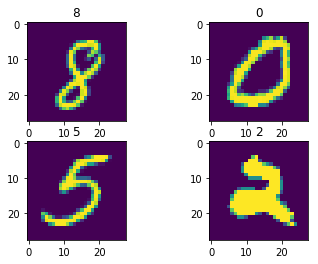

In [17]:
X, y = draw_random_images(train_loader)

In [18]:
class SimpleDenseNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleDenseNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc_output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return F.log_softmax(self.fc_output(x))
    

In [19]:
net = SimpleDenseNet(28*28).to(device)
net

SimpleDenseNet(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc_output): Linear(in_features=256, out_features=10, bias=True)
)

In [20]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Batch Accuracy: ', (torch.argmax(output,1) == target).sum().item()/batch_size)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [21]:
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [22]:
train(net, train_loader, optimizer, 50)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Batch Accuracy:  0.1875
Train Epoch: 50 [0/60000 (0%)]	Loss: 2.282829
Batch Accuracy:  0.25
Train Epoch: 50 [1600/60000 (3%)]	Loss: 2.288347
Batch Accuracy:  0.3125
Train Epoch: 50 [3200/60000 (5%)]	Loss: 2.258720
Batch Accuracy:  0.3125
Train Epoch: 50 [4800/60000 (8%)]	Loss: 2.256721
Batch Accuracy:  0.3125
Train Epoch: 50 [6400/60000 (11%)]	Loss: 2.259532
Batch Accuracy:  0.40625
Train Epoch: 50 [8000/60000 (13%)]	Loss: 2.243279
Batch Accuracy:  0.375
Train Epoch: 50 [9600/60000 (16%)]	Loss: 2.223096
Batch Accuracy:  0.5625
Train Epoch: 50 [11200/60000 (19%)]	Loss: 2.186799
Batch Accuracy:  0.6875
Train Epoch: 50 [12800/60000 (21%)]	Loss: 2.170178
Batch Accuracy:  0.28125
Train Epoch: 50 [14400/60000 (24%)]	Loss: 2.214509
Batch Accuracy:  0.5625
Train Epoch: 50 [16000/60000 (27%)]	Loss: 2.144142
Batch Accuracy:  0.71875
Train Epoch: 50 [17600/60000 (29%)]	Loss: 2.110268
Batch Accuracy:  0.6875
Train Epoch: 50 [19200/60000 (32%)]	Loss: 2.082780
Batch Accuracy:  0.71875
Train Epoch: 5

In [23]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [24]:
test(net, test_loader)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  



Test set: Average loss: 1.0818, Accuracy: 8037/10000 (80%)



torch.Size([4, 1, 28, 28]) torch.Size([4])


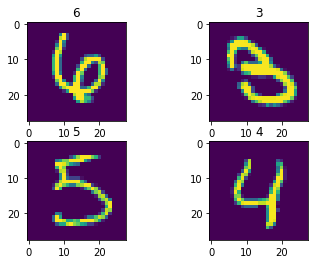

In [25]:
X, y = draw_random_images(test_loader)

In [26]:
predicted_y = net(X).argmax(1)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [27]:
predicted_y

tensor([6, 3, 3, 4])

In [28]:
y

tensor([6, 3, 5, 4])